In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
import shutil
shutil.move('kaggle.json', '/root/.kaggle')

'/root/.kaggle/kaggle.json'

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arashnic/imbalanced-data-practice

Dataset URL: https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice
License(s): CC0-1.0


In [ ]:
!unzip /content/imbalanced-data-practice.zip

Archive:  /content/imbalanced-data-practice.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/aug_train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


<Axes: >

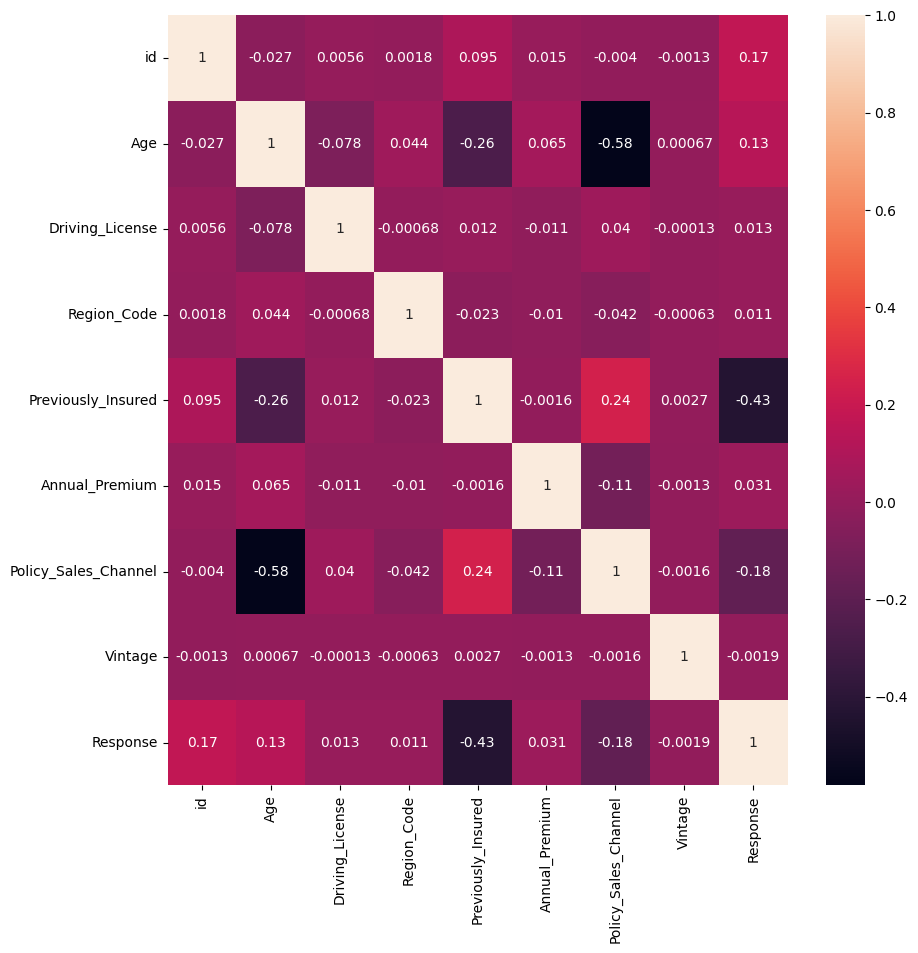

In [ ]:
df_corr=df.corr(numeric_only=True)
df_corr

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr,annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [ ]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Response', axis = 1)
y = df['Response'].copy()

In [ ]:
y

,Response
0,0
1,0
2,0
3,0
4,0
...,...
382149,0
382150,0
382151,0
382152,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
150916,181302,Male,52,1,28.0,0,> 2 Years,Yes,53145.0,26.0,194
83833,203124,Female,52,1,28.0,0,1-2 Year,Yes,40857.0,124.0,283
154492,316922,Female,58,1,24.0,0,1-2 Year,No,45465.0,145.0,203
49,303609,Male,22,1,8.0,0,< 1 Year,No,65167.0,152.0,14
182243,121628,Male,66,1,52.0,1,1-2 Year,No,31707.0,26.0,155
...,...,...,...,...,...,...,...,...,...,...,...
147861,21138,Female,74,1,28.0,0,> 2 Years,Yes,54195.0,26.0,36
100325,144651,Male,37,1,28.0,0,1-2 Year,Yes,46188.0,52.0,97
200822,191102,Male,28,1,28.0,1,< 1 Year,No,40300.0,152.0,106
138190,108290,Male,48,1,28.0,0,1-2 Year,Yes,27996.0,26.0,97


In [ ]:
y_train

,Response
150916,0
83833,0
154492,0
49,0
182243,0
...,...
147861,1
100325,0
200822,0
138190,1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
oe = OrdinalEncoder()

In [ ]:
X_train_encoded = oe.fit_transform(X_train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']])
X_test_encoded = oe.transform(X_test[['Gender', 'Vehicle_Age', 'Vehicle_Damage']])

In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [ ]:
rfr = RandomForestClassifier()

In [ ]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())

])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy= 'constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown= 'ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder = 'passthrough')

In [ ]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object'))])

In [ ]:
X_train_transformed_df = pd.DataFrame(data = transformer.transform(X_train), columns = transformer.get_feature_names_out())
X_test_transformed_df = pd.DataFrame(data = transformer.transform(X_test), columns = transformer.get_feature_names_out())

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train_transformed_df, y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_train_transformed_df, y_train), rfc.score(X_test_transformed_df, y_test)

(0.9999901871955986, 0.894074393897764)